In [44]:
from IPython.display import Image


# Stack& Queue

- [x]  Lv2 : 탑
- [ ]  ***Lv2 : 다리를 지나는 트럭*** 😱
- [ ]  Lv2 : 기능개발
- [ ]  Lv2 : 프린터
- [ ]  Lv2 : 쇠막대기
- [ ]  Lv2 : 주식가격

출처 : https://programmers.co.kr/learn/courses/30/parts/12081

## 탑

수평 직선에 탑 N대를 세웠습니다. 모든 탑의 꼭대기에는 신호를 송/수신하는 장치를 설치했습니다. 발사한 신호는 신호를 보낸 탑보다 높은 탑에서만 수신합니다. 또한, 한 번 수신된 신호는 다른 탑으로 송신되지 않습니다.

예를 들어 높이가 6, 9, 5, 7, 4인 다섯 탑이 왼쪽으로 동시에 레이저 신호를 발사합니다. 그러면, 탑은 다음과 같이 신호를 주고받습니다. 높이가 4인 다섯 번째 탑에서 발사한 신호는 높이가 7인 네 번째 탑이 수신하고, 높이가 7인 네 번째 탑의 신호는 높이가 9인 두 번째 탑이, 높이가 5인 세 번째 탑의 신호도 높이가 9인 두 번째 탑이 수신합니다. 높이가 9인 두 번째 탑과 높이가 6인 첫 번째 탑이 보낸 레이저 신호는 어떤 탑에서도 수신할 수 없습니다.

맨 왼쪽부터 순서대로 탑의 높이를 담은 배열 heights가 매개변수로 주어질 때 각 탑이 쏜 신호를 어느 탑에서 받았는지 기록한 배열을 return 하도록 solution 함수를 작성해주세요.

제한 사항
heights는 길이 2 이상 100 이하인 정수 배열입니다.
모든 탑의 높이는 1 이상 100 이하입니다.
신호를 수신하는 탑이 없으면 0으로 표시합니다.
***
1. 반복문으로 풀기
    - 왼쪽에 나보다 낮은 탑이 있으면 송신!
    
2. Stack 사용해서 풀기


https://programmers.co.kr/learn/courses/30/lessons/42588

**반복문**

In [42]:
def solution(heights):
    
    total = len(heights)
    reverse_h = heights[::-1]
    answer = [0] * total
    
    for idx, h in enumerate(reverse_h): # 뒤에서부터 반복문 돌기
#         print("idx : ", total-idx, h)
        for receiver_idx, receiver_h in enumerate(heights[:total-idx-1]):
            
            if receiver_h > h:
#                 print(receiver_h, h)
#                 print(total-idx-1,receiver_idx+1)
#                 print("***")
                answer[total-idx-1] = receiver_idx+1
#                 print(answer)
            
    return answer


In [43]:
heights = [3,9,9,3,5,7,2]
solution(heights)

[0, 0, 0, 3, 3, 3, 6]

**Stack**
- Stack : Last In First Out (LIFO)
- 송신탑은 뒤에서부터 처리하기 때문에 Stack 이 적합
    - 신호를 쏘는 송신탑보다 높은 탑이 나올때까지 계속 빼주기
    - ***pop()*** : 뒤에서부터 뽑아주는 함수


In [55]:
def solution(heights):
    answer = [0] * len(heights)
    while heights:
        right = heights.pop()
        print(right, heights)
        for idx in range(len(heights)-1, -1, -1):
            if heights[idx] > right:
                answer[len(heights)] = idx+1
                break
    return answer

In [56]:
heights = [3,9,9,3,5,7,2]
solution(heights)

2 [3, 9, 9, 3, 5, 7]
7 [3, 9, 9, 3, 5]
5 [3, 9, 9, 3]
3 [3, 9, 9]
9 [3, 9]
9 [3]
3 []


[0, 0, 0, 3, 3, 3, 6]

## 다리를 지나는 트럭 (***다시풀기!!***)

트럭 여러 대가 강을 가로지르는 일 차선 다리를 정해진 순으로 건너려 합니다. 모든 트럭이 다리를 건너려면 최소 몇 초가 걸리는지 알아내야 합니다. 트럭은 1초에 1만큼 움직이며, 다리 길이는 bridge_length이고 다리는 무게 weight까지 견딥니다.   
※ 트럭이 다리에 완전히 오르지 않은 경우, 이 트럭의 무게는 고려하지 않습니다.

예를 들어, 길이가 2이고 10kg 무게를 견디는 다리가 있습니다. 무게가 [7, 4, 5, 6]kg인 트럭이 순서대로 최단 시간 안에 다리를 건너려면 다음과 같이 건너야 합니다.
따라서, 모든 트럭이 다리를 지나려면 최소 8초가 걸립니다.

solution 함수의 매개변수로 다리 길이 bridge_length, 다리가 견딜 수 있는 무게 weight, 트럭별 무게 truck_weights가 주어집니다. 이때 모든 트럭이 다리를 건너려면 최소 몇 초가 걸리는지 return 하도록 solution 함수를 완성하세요.

****
1. 가장 앞에 있는 트럭을 뽑는다
2. 다리에 있는 트럭을 확인한다
3. 다리에 트럭이 없거나, 다리에 있는 트럭 + 뽑은 트럭의 합이 weight 이하이면 다리에 트럭을 넣는다
3. ***트럭이 들어간 후, 다리의 길이만큼 지나면 빼낸다***
4. 1초마다 반복

***
참고: https://mentha2.tistory.com/16 [행궁동 데이터과학자]   
https://programmers.co.kr/learn/courses/30/lessons/42583

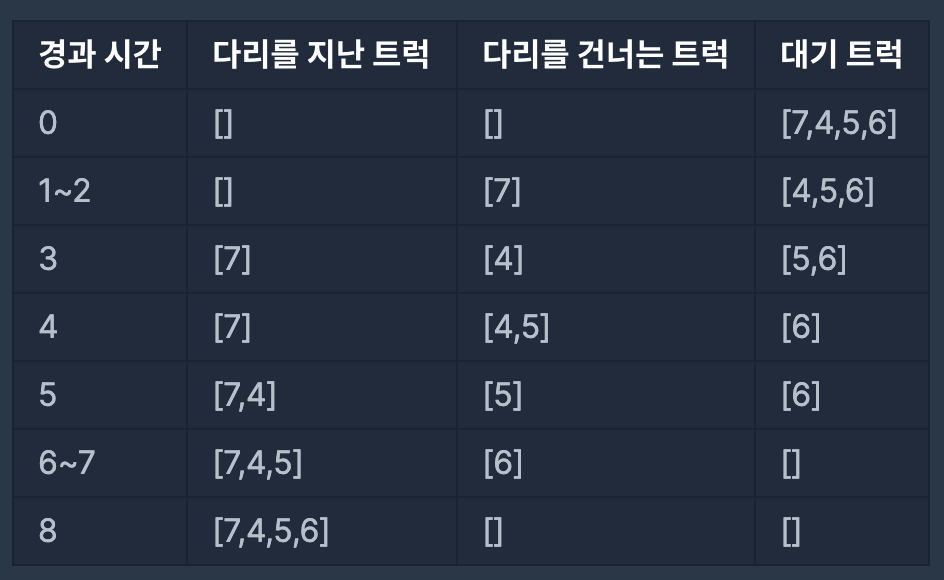

In [57]:
Image("../../img/Programmers_다리를지나는트럭.png") # code안에서 나오게 할 때

***테스트케이스 5 실행시간초과***

In [207]:
from collections import deque


def solution(bridge_length, weight, truck_weights):
    q = deque([0]) * bridge_length
    
    trucks = truck_weights[::-1]
    sec=0
    while q:
        sec+=1
        q.popleft()
        
        if trucks:
            if sum(q) + trucks[len(trucks)-1] <= weight:
                q.append(trucks.pop())
            else:
                q.append(0)
    return sec




***테스트케이스 5***
- sum() 은 O(N) 
- 다리에 들어오고 나가는 트럭의 무게만 잘 관리하면, 매번 bridge의 총합을 더할 필요는 없음!!  (?)


In [258]:
from collections import deque

def solution(bridge_length, weight, truck_weights):
    q = deque([0]) * bridge_length
    
    trucks = truck_weights[::-1]
    sec=0
    while q:
        sec+=1
        out = q.popleft()
        
        if trucks: 
            if sum(q) + trucks[len(trucks)-1] <= weight:
                q.append(trucks.pop())
            else:
                q.append(0)
    return sec


In [259]:
bridge_length = 2
weight = 10
truck_weights = [7, 4, 5, 6]

solution(bridge_length, weight, truck_weights)

8

## 기능개발

프로그래머스 팀에서는 기능 개선 작업을 수행 중입니다. 각 기능은 진도가 100%일 때 서비스에 반영할 수 있습니다.

또, 각 기능의 개발속도는 모두 다르기 때문에 뒤에 있는 기능이 앞에 있는 기능보다 먼저 개발될 수 있고, 이때 뒤에 있는 기능은 앞에 있는 기능이 배포될 때 함께 배포됩니다.

먼저 배포되어야 하는 순서대로 작업의 진도가 적힌 정수 배열 progresses와 각 작업의 개발 속도가 적힌 정수 배열 speeds가 주어질 때 각 배포마다 몇 개의 기능이 배포되는지를 return 하도록 solution 함수를 완성하세요.

제한 사항
- 작업의 개수(progresses, speeds배열의 길이)는 100개 이하입니다.
- 작업 진도는 100 미만의 자연수입니다.
- 작업 속도는 100 이하의 자연수입니다.
- 배포는 하루에 한 번만 할 수 있으며, 하루의 끝에 이루어진다고 가정합니다. 예를 들어 진도율이 95%인 작업의 개발 속도가 하루에 4%라면 배포는 2일 뒤에 이루어집니다.

https://programmers.co.kr/learn/courses/30/lessons/42586

In [265]:
def solution(progresses, speeds):
    answer = []

    for p, s in zip(progresses, speeds):
        todo = 100 - p
        days = 0
        if todo % s == 0:
            days = todo //s
        else:
            days = (todo // s) + 1
        day_todo.append(days)
          
    print(day_todo)
    
    for idx, d in enumerate(day_todo):
        [item if item <=d for item in day_todo[idx+1:]]
    return answer

In [266]:
progresses = [93,30,55]
speeds = [1,30,5]
solution(progresses, speeds)

[7, 3, 9]


[]